In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

%matplotlib inline

DATA_FILE = 'data/fire_theft.xls'

## Step 1: read in data from the .xls file


In [18]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

n_samples

42

## Step 2: create placeholders for input X (number of fire) and label Y (number of theft)


In [19]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

## Step 3: create weights (w, u) and bias (b), initialized to 0


In [20]:
w = tf.Variable(0.0, name='weights2')
u = tf.Variable(0.0, name='weights1')
b = tf.Variable(0.0, name='bias')

## Step 4: build model to predict Y


In [21]:
Y_predicted = X * X * w + X * u + b

## Step 5: use the Huber Loss as the loss function

\## **Robust to outliers**.

**Intuition**: 

If the difference between the predicted value and the real value is small, square it.

If it’s large, take its absolute value.

![Equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/21983befe82b2509d1bb8dfa1064a35b6031d508)


In [22]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)


loss = huber_loss(Y, Y_predicted)

## Step 6: using gradient descent with learning rate of 0.00001 to minimize loss


In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

## Step 7, 8, 9 -> inside tf.session()

#### Step 7: initialize the necessary variables, in this case, w and b
#### Step 8: train the model
#### Step 9: output the values of w and b


In [24]:
with tf.Session() as sess:
    
    # Step 7: initialize the necessary variables, in this case, w and b
    
    sess.run(tf.global_variables_initializer()) 

    # Step 8: train the model
    
    for i in range(100): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    
    # Step 9: output the values of w and b
    
    w, u, b = sess.run([w, u, b]) 

Epoch 0: 27.256524267650786
Epoch 1: 23.762969136238098
Epoch 2: 24.077993915194558
Epoch 3: 24.034702028547013
Epoch 4: 24.01277771313367
Epoch 5: 24.006988969365402
Epoch 6: 23.999519307343732
Epoch 7: 23.992390260721248
Epoch 8: 23.98520295774298
Epoch 9: 23.97802561251003
Epoch 10: 23.97084736788557
Epoch 11: 23.96366834090579
Epoch 12: 23.956490199458564
Epoch 13: 23.949311477974767
Epoch 14: 23.94213268216256
Epoch 15: 23.934953956554335
Epoch 16: 23.927775354789837
Epoch 17: 23.920596973881835
Epoch 18: 23.91341865080453
Epoch 19: 23.90623992929856
Epoch 20: 23.89906151539513
Epoch 21: 23.89188268656532
Epoch 22: 23.884704617362114
Epoch 23: 23.87752638508876
Epoch 24: 23.870347273469502
Epoch 25: 23.863168523070357
Epoch 26: 23.855990074064938
Epoch 27: 23.84881166634815
Epoch 28: 23.841633223529374
Epoch 29: 23.83445431418451
Epoch 30: 23.827276088119973
Epoch 31: 23.82009768450544
Epoch 32: 23.812918601779355
Epoch 33: 23.805740458269913
Epoch 34: 23.798561846194346
Epoch 35:

In [25]:
print(b)
print(u)
print(w)


0.0291879
0.172772
0.0537374


# Plot the results


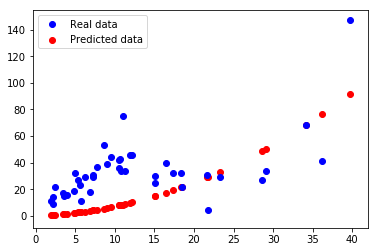

In [26]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.scatter(X, X * X * w + X * u + b, color = 'red', label='Predicted data')
plt.legend()
plt.show()

## Compare with the SGD, BGD, and Normalized version

SGD with **100 epoch** and **learning rate = .00001**


BGD with **100 epoch** and **learning rate = .00001**

Basis Function Expansion with SGD & *huber loss* - **100 epoch** and **learning rate = .00001**


|                   | **bias**(b)   | **Weight**(w) | **Cost**         |
| ----------------  |:-------------:| -------------:| ----------------:|
| **SGD**           | 0.611998      | 2.13033       | 463.52           |
| **BGD**           | 0.612963      | 2.13865       | 457.91           |
|**Normal(OLS)Eqn** | 16.99516296   | 1.31345558    | 360.82014974     |
|**BFE(Huber Loss)**| 0.0291879     | 0.172, 0.053  | 23.331           |
